In [5]:
# Linear Regression 모델 생성 및 데이터 준비
import torch
from torch import nn
import matplotlib.pyplot as plt

# create known parameters
weight = 0.7
bias = 0.3

# create input data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)  # (N, 1)으로 변환
y = weight * X + bias

# 데이터 분할
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Linear Regression 모델 클래스 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# 모델 생성
model_0 = LinearRegressionModel()

# 예측 전 X_test 차원 확인 및 변환 (필요할 경우)
print(X_test.shape)  # 2차원인지 확인
if len(X_test.shape) == 1:
    X_test = X_test.unsqueeze(dim=1)  # 1차원일 경우 2차원으로 변환

# 추론 모드로 예측 수행
with torch.inference_mode():
    y_preds = model_0(X_test)

# 예측 결과 출력
print(y_preds)


torch.Size([10, 1])
tensor([[0.5660],
        [0.5582],
        [0.5505],
        [0.5427],
        [0.5349],
        [0.5271],
        [0.5193],
        [0.5116],
        [0.5038],
        [0.4960]])


In [6]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [7]:
# lets use function to visualize it 
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):# we don't have any predictions yet 
    
# **y_train**은 **훈련 데이터에 해당하는 정답(출력 값)**으로, 
# 입력 데이터에 대한 실제 레이블이야. 그래서 여기서는 **train_labels**라고 부른 거야.
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # c가 컬러여서. b는 blue 이다. s는 size
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

# are there predictions? 
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  # 데이터 시리즈나 요소들이 무엇을 의미하는지 설명하는 **범례(legend)**
  plt.legend(prop={"size": 14});
  



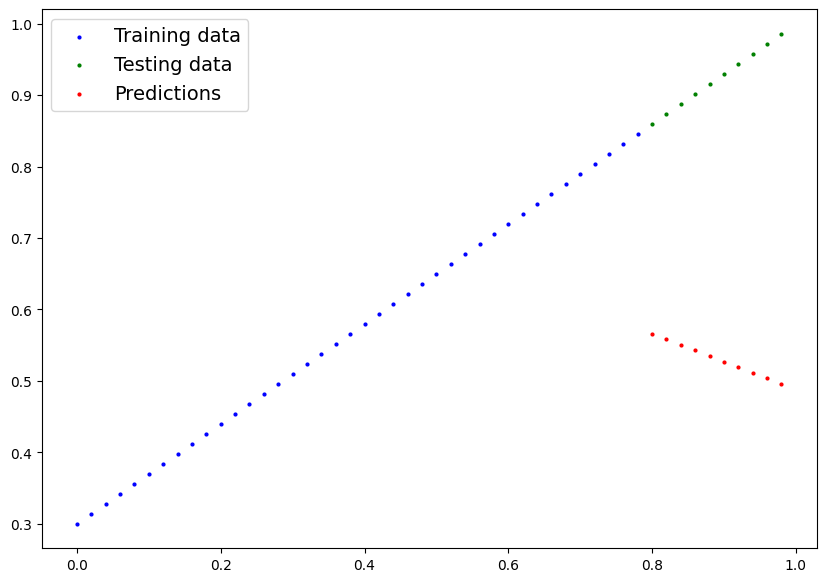

In [8]:
plot_predictions(predictions=y_preds)